# Week 7 - Support Vector Machines

This week, we'll discuss the support vector machine (SVM) algorithm. These are often considered to be the best "black box" learning algorithm and one of the most widely used learning algorithms today. This is the last of the supervised learning algorithms that we'll discuss in depth.

The topics we'll cover this week are
* Large Margin Classification
  * Optimization Objective
  * Large Margin Intuition
  * Mathematics Behind Large Margin Classification
* Kernels
* SVMs in Practice

## Large Margin Classification

### Optimization Objective

Let's revisit logistic regression briefly. We had

$$ h_\theta (x) = \frac{1}{1 + \exp(-\theta^T x)} $$

and the goal is

$$y = 1 \Rightarrow h_\theta (x) \approx 1 \Rightarrow \theta^T x \gg 0$$
$$y = 0 \Rightarrow h_\theta (x) \approx 0 \Rightarrow \theta^T x \ll 0$$

and this is because of the sigmoid function. The cost function was

$$ \begin{align} 
J (\theta) & = - (y \log h_\theta (x) + (1-y) \log (1 - h_\theta (x)) ) \\
& = - y \log \Big(\frac{1}{1 + \exp(-\theta^T x)}\Big) - (1-y) \log \Big(1 - \frac{1}{1 + \exp(-\theta^T x)}\Big)
\end{align} $$

We've shown these functions below.

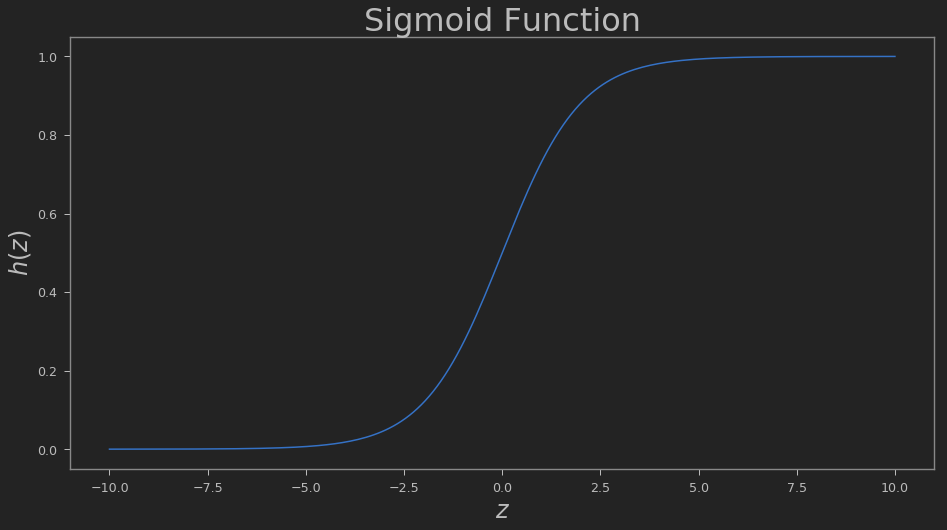

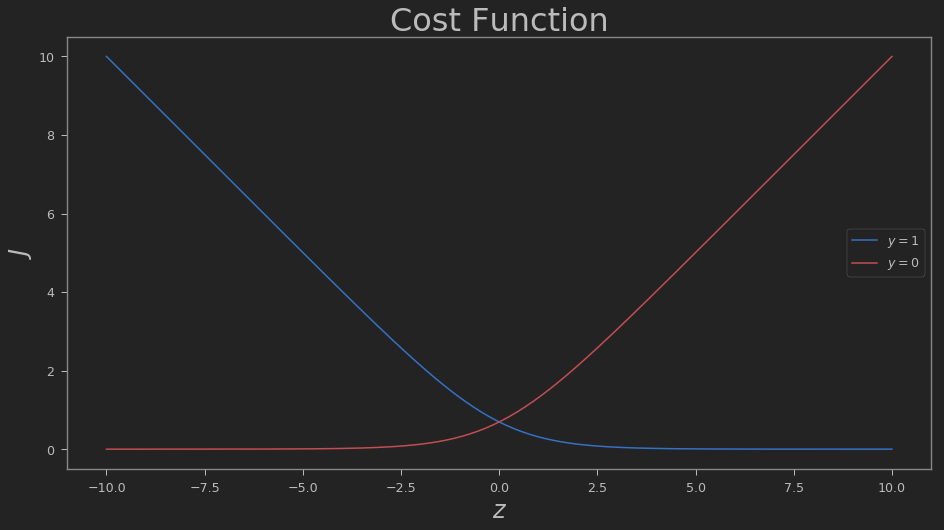

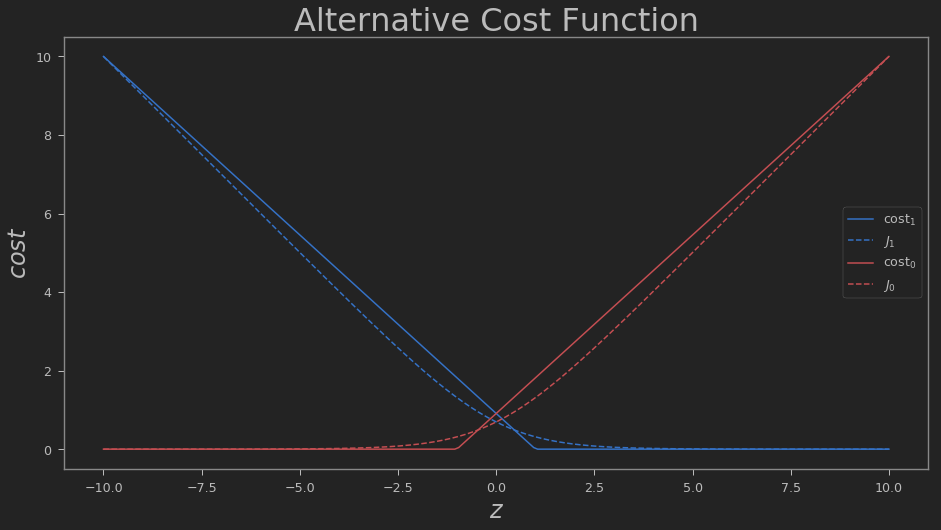

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style(theme='monokai',context='notebook',ticks=True,grid=False)

z = np.linspace(-10.,10.,200)
h = 1./(1. + np.exp(-z))
y = 0
J0 = -y*np.log(h)-((1.-y)*np.log(1-h))
y = 1
J1 = -y*np.log(h)-((1.-y)*np.log(1-h))

# Create the plot of the sigmoid function
fig = plt.figure(figsize=(12,6));
ax = fig.add_axes([0,0,1,1]);
ax.plot(z,h,color='b');
ax.set_xlabel('$z$',fontsize=24);
ax.set_ylabel('$h(z)$',fontsize=24);
ax.set_title('Sigmoid Function',fontsize=32);

# Create the plot of the cost function
fig = plt.figure(figsize=(12,6));
ax = fig.add_axes([0,0,1,1]);
ax.plot(z,J1,color='b');
ax.plot(z,J0,color='r');
ax.set_xlabel('$z$',fontsize=24);
ax.set_ylabel('$J$',fontsize=24);
ax.legend(('$y = 1$','$y = 0$'));
ax.set_title('Cost Function',fontsize=32);

# Create a plot of a simpler approximation to the cost function
y0 = 10.
z0 = -10.
y1 = 0.
z1 = 1.
m = (y0-y1)/(z0-z1)
b = y0 - z0*m
cost1 = np.where(z<1,m*z+b,0)
y0 = 10.
z0 = 10.
y1 = 0.
z1 = -1.
m = (y0-y1)/(z0-z1)
b = y0 - z0*m
cost0 = np.where(z>-1,m*z+b,0)
fig = plt.figure(figsize=(12,6));
ax = fig.add_axes([0,0,1,1]);
ax.plot(z,cost1,color='b');
ax.plot(z,J1,color='b',linestyle='dashed');
ax.plot(z,cost0,color='r');
ax.plot(z,J0,color='r',linestyle='dashed');
ax.set_xlabel('$z$',fontsize=24);
ax.set_ylabel('cost',fontsize=24);
ax.legend(('cost$_1$','$J_1$','cost$_0$','$J_0$'));
ax.set_title('Alternative Cost Function',fontsize=32);

From the cost function, we can see that when the input is large, we have very little error. Now, we can recreate this function as a bit differently as a few straight lines that closely approximate this function, as shown in the last figure above. For the positive case, our function would simply be a straight line for 

$$ z < 1 $$

and another straight at 0 cost for 

$$ z > 1 $$

and we would similarly do the same for the cost function for the negative case. We'll call these two piecewise functions

$$ \text{cost}_1 \text{ and } \text{cost}_0.$$

Our cost function (with regularization) becomes

$$ \min_\theta \frac{1}{m} \sum_{i=1}^m y^{(i)} \text{cost}_1 (\theta^T x^{(i)}) + (1-y^{(i)}) \text{cost}_0 (\theta^T x^{(i)}) + \frac{\lambda}{2 m} \sum_{j=1}^n \theta_j^2 .$$

Really, the fraction

$$\frac{1}{m}$$

is just a constant, and our function is minimized to the same parameter values regardless if it's multiplied by the constant or not, so let's rewrite as

$$ \min_\theta \sum_{i=1}^m y^{(i)} \text{cost}_1 (\theta^T x^{(i)}) + (1-y^{(i)}) \text{cost}_0 (\theta^T x^{(i)}) + \frac{\lambda}{2} \sum_{j=1}^n \theta_j^2 .$$

Note that this has the form

$$ A + \lambda B $$

where the first term is the actual cost function and the second term is the regularization term. For SVMs, we will instead parameterize as 

$$ C A + B .$$

This is just a different way of controlling the regularization parameter by controlling how much we do or don't weigh the regularization terms. The two are equivalent if 

$$ C = \lambda^{-1} $$

With this, our cost function minimization becomes

$$ \min_\theta C \sum_{i=1}^m y^{(i)} \text{cost}_1 (\theta^T x^{(i)}) + (1-y^{(i)}) \text{cost}_0 (\theta^T x^{(i)}) + \frac{1}{2} \sum_{j=1}^n \theta_j^2 .$$

The SVM hypothesis doesn't output the probability this time but instead we'll get

$$h_\theta (x) = \begin{cases} 1 & \text{ if } \theta^T x \geq 0 \\ 0 & \text{ otherwise } \end{cases}$$ 

### Large Margin Intuition

SVMs are sometimes referred to as large margin classifiers. For our SVM, we want

$$y = 1 \Rightarrow \theta^T x \geq 1$$
$$y = 0 \Rightarrow \theta^T x \leq -1$$

which is different from before, because we were separated the two at zero. But in this case, we have a margin between the two classes between +1 and -1.

Let's see what happens when we set the constant

$C \gg 1.$

This causes the 

$$ C A + B .$$

to emphasize the first term, so to minimize the cost, we want the first term

$$ A \rightarrow 0 $$

Whenever we have 

$$y = 1$$

we need to find the value of the parameters such that

$$\theta^T x \geq 1$$

which means our cost is 0, so we are minimizing

$$ \min_\theta C \cdot 0 + \frac{1}{2} \sum_{j=1}^n \theta_j^2, $$

subject to the following:

$$ \theta^T x^{(i)} \geq 1 \text{ if } y^{(i)} = 1 \\
\theta^T x^{(i)} < -1 \text{ if } y^{(i)} = 0 .$$

And it turns out that when you solve this, you get the best decision boundary for classification that maximizes the distance, or the margin, from the classes in the training samples.  The effect of choosing a very large C is to adhere the decision boundary more to outliers, while a smaller C will keep a more broad separation. Intuitively, this is because we are weighing our regularization less for larger values of C.

### Mathematics Behind Large Margin Classification

Before we jump in, note that the length of a vector 

$$ u = \begin{bmatrix} u_1 \\ u_2 \end{bmatrix} $$

can be written as

$$ || u || = u^T u = \sqrt{u_1^2 + u_2^2} .$$

And if we let 
* $p := $ the length of the projection of $v$ onto $u$,

we get 

$$ u^T v = p \cdot ||u|| = u_1 v_1 + u_2 v_2 $$

Let's look at the vector 

$$ \theta = \begin{bmatrix} \theta_1 \\ \theta_2 \end{bmatrix} $$

where here we're ignoring the intercept term. Now for our SVM decision boundary, we have

$$ \min_\theta \frac{1}{2} \sum_{j=1}^n \theta_j^2 = \frac{1}{2} \Big( \sqrt{\theta_1^2 + \theta_2^2} \Big)^2 = \frac{1}{2} ||\theta||^2,$$

subject to the following:

$$ \theta^T x^{(i)} \geq 1 \text{ if } y^{(i)} = 1 \\
\theta^T x^{(i)} < -1 \text{ if } y^{(i)} = 0 .$$

So the inner product here is then

$$ \theta^T x^{(i)} = p^{(i)} ||\theta|| = \theta_1 x_1^{(i)} + \theta_2 x_2^{(i)} $$

where
* $p^{(i)} := $ the length of the projection of $x^{(i)}$ onto $\theta$,

So now our optimization objective is 

$$ \min_\theta \frac{1}{2} ||\theta||^2,$$

subject to the following:

$$ p^{(i)} ||\theta|| \geq 1 \text{ if } y^{(i)} = 1 \\
p^{(i)} ||\theta|| < -1 \text{ if } y^{(i)} = 0 .$$

Our parameter vector is orthogonal to the decision boundary. Therefore, when the boundary is close to a sample, the value 

$$ p^{(i)} $$

is going to be small, but again we need 

$$ p^{(i)} ||\theta|| \geq 1 \text{ if } y^{(i)} = 1 \\
p^{(i)} ||\theta|| < -1 \text{ if } y^{(i)} = 0 .$$

So for this to be true, 

$$||\theta|| \gg 1$$

And we're trying to minimize

$$ \min_\theta \frac{1}{2} ||\theta||^2.$$

This is going to be hard to accomplish for a decision boundary that has small margins. So we're going to be looking for the largest margins possible around the decision boundary. This is why the SVM chooses the large margin boundary.

The effect of choosing the simplification 

$$ \theta_0 = 0 $$

was just to force the decision boundary to be fixed at the origin, but this isn't necessary to prove that this is how SVM works.

## Kernels

One way to adapt SVMs for complex non-linear classifiers is through "kernels". We can use complex polynomials to predict 

$$ y = 1 \text{ if } \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \theta_3 x_1^2 + \theta_4 x_1 x_2 + \theta_5 x_2^2 + \cdots \geq 0 $$

But is there a better way to select our features? We can compute features based on the proximity to landmarks:

$$f_i = \text{similarity}(x,l^{(i)}) = \exp \Big(- \frac{|| x-l^{(i)} ||^2}{2 \sigma^2} \Big) $$

where
* $f_i$ is the feature associately with $l_i$
* $l_i$ is our "landmark"

This particularly similarity function, or "kernel", is called a Gaussian kernel, which we will write as 

$$ k(x,l^{(i)}) .$$

Note that the feature can also be written as

$$ \exp \Big(- \frac{\sum_{j=1}^n (x_j-l_j^{(i)})^2}{2 \sigma^2} \Big) $$

Suppose the landmark and features are close:

$$ x \approx l^{(1)} \Rightarrow || x-l^{(1)} ||^2 \approx 0 \Rightarrow f_1 \approx 1 $$

and conversely, if the two are far apart

$$ x \not\approx l^{(1)} \Rightarrow || x-l^{(1)} ||^2 \gg 0 \Rightarrow f_1 \approx 0 $$

Let's look at what this looks like in code, varying the variance parameter in the kernel.

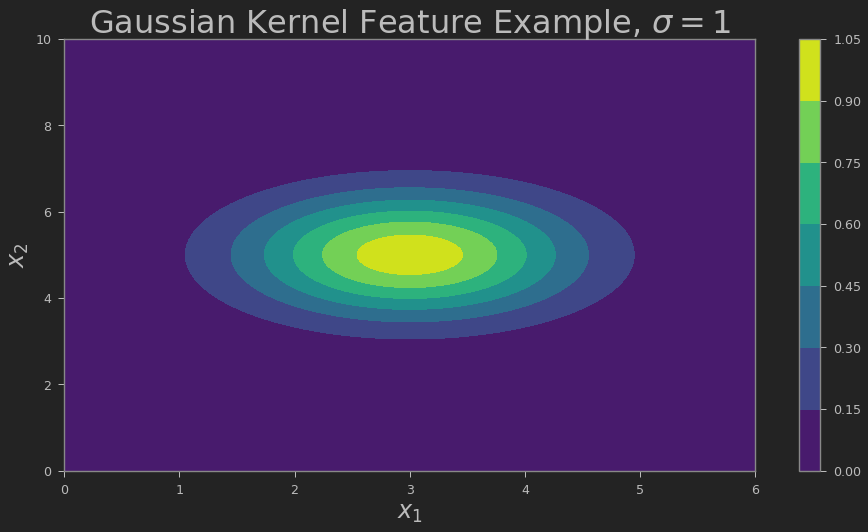

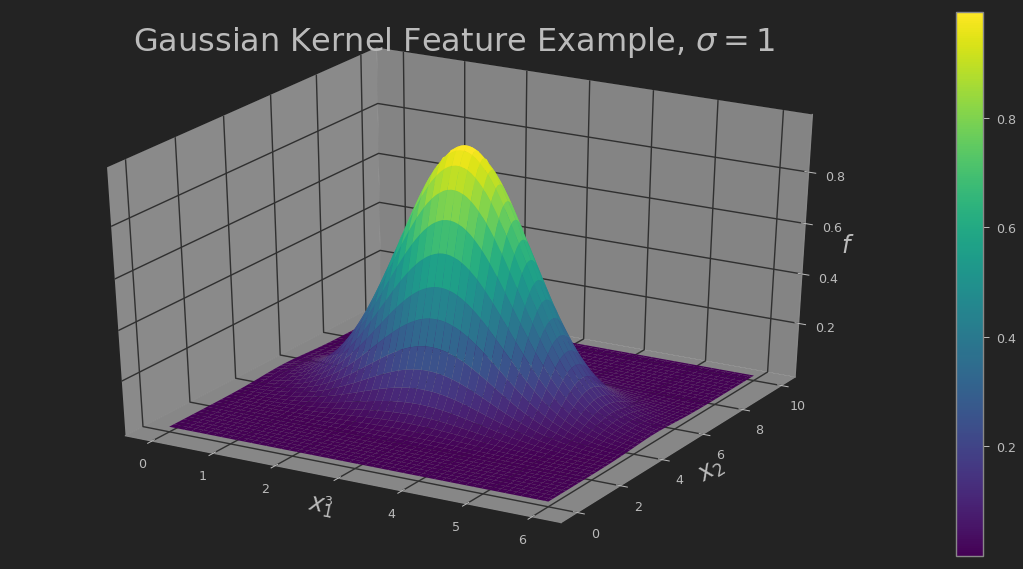

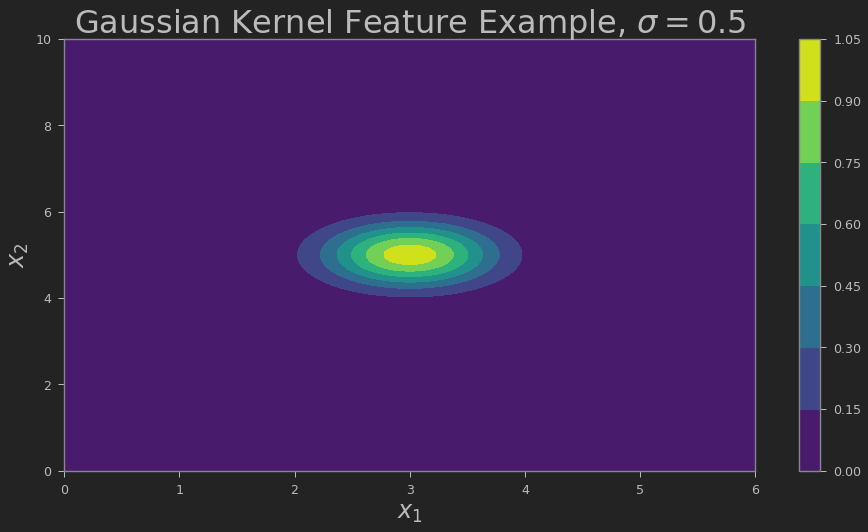

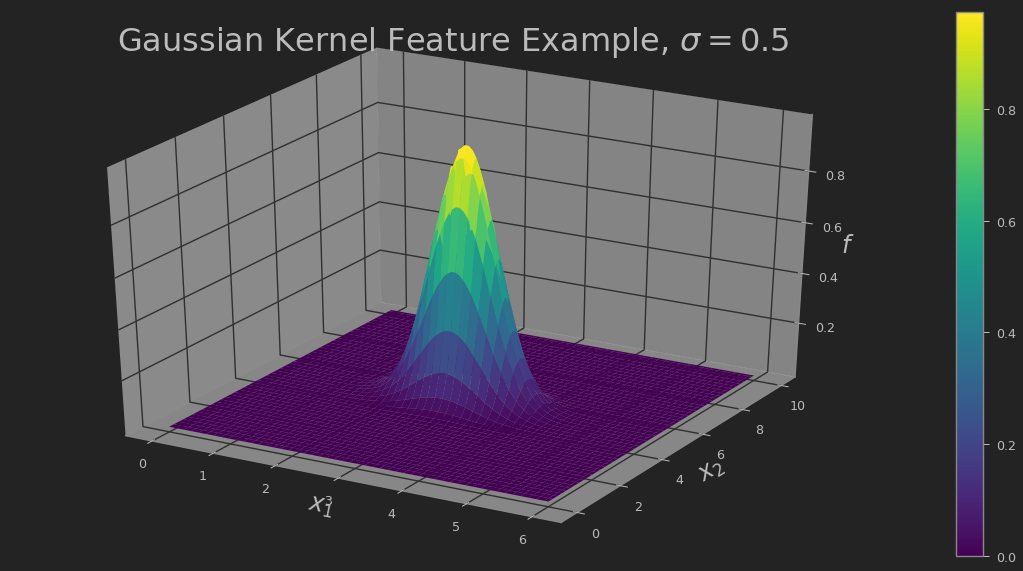

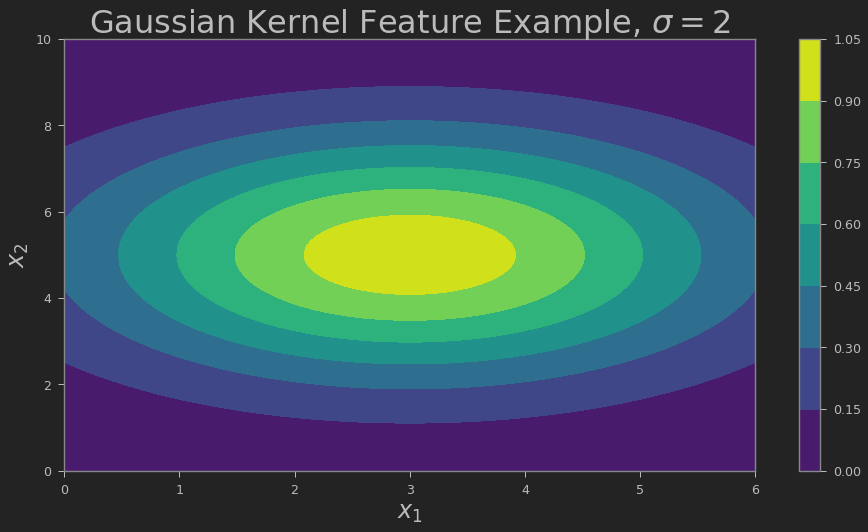

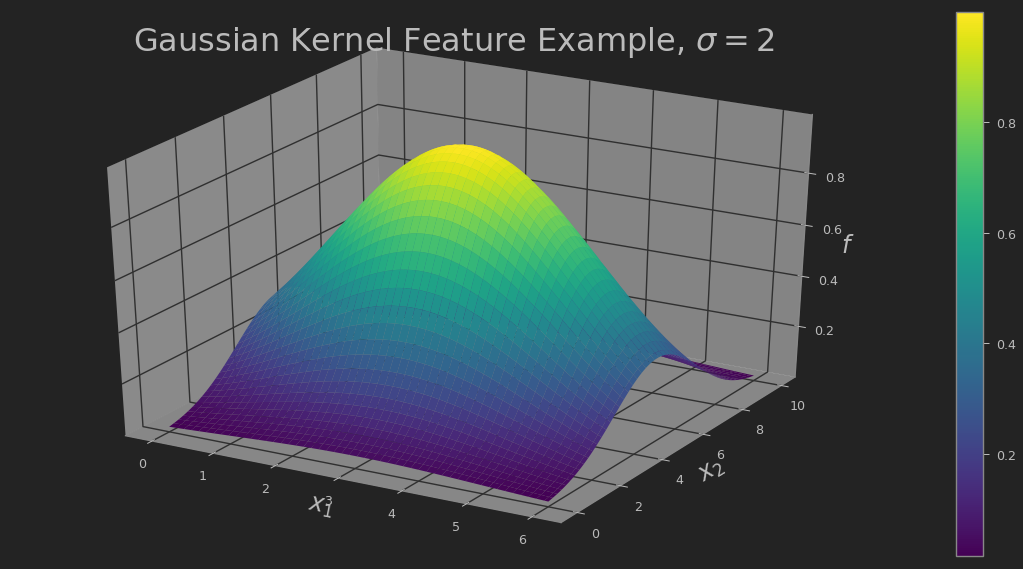

In [120]:
def gaussian_kernel(l,sigma):
    
    """ Calculate the Gaussian kernel for two features given a specified landmark and sigma"""
    
    # Set feature space
    x1 = np.linspace(l[0,0]*0.,l[0,0]*2.,100)
    x2 = np.linspace(l[0,1]*0.,l[0,1]*2.,100)
    X1,X2 = np.meshgrid(x1,x2)

    # Calculate new feature based on landmark l and feature x1 and x2
    distance = (X1-l[0,0])**2+(X2-l[0,1])**2
    f = np.exp(-distance/(2*sigma**2))
    
    return f,X1,X2

# Set the landmark location and sigmas
l = np.matrix([3.,5.])
sigmas = [1.,0.5,2.]

# Calculate the different features with different sigmas
f1,X1,X2 = gaussian_kernel(l,sigmas[0])
f2 = gaussian_kernel(l,sigmas[1])[0]
f3 = gaussian_kernel(l,sigmas[2])[0]

# Create a plot of the new feature
fig = plt.figure(figsize=(12,6));
ax = fig.add_axes([0,0,1,1]);
contour = ax.contourf(X1,X2,f1,cmap='viridis')
ax.set_xlabel('$x_1$',fontsize=24);
ax.set_ylabel('$x_2$',fontsize=24);
ax.set_title('Gaussian Kernel Feature Example, $\sigma = 1$',fontsize=32);
cbar = plt.colorbar(contour,ax=ax);

# Create a 3D plot
from mpl_toolkits import mplot3d
fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection='3d')
ax.set_xlabel(r'$x_1$',fontsize=24);
ax.set_ylabel(r'$x_2$',fontsize=24);
ax.set_zlabel(r'$f$',fontsize=24);
ax.set_title('Gaussian Kernel Feature Example, $\sigma = 1$',fontsize=32);
surface = ax.plot_surface(X1,X2,f1,cmap='viridis');
cbar = plt.colorbar(surface,ax=ax);

# Create a plot of the new feature
fig = plt.figure(figsize=(12,6));
ax = fig.add_axes([0,0,1,1]);
contour = ax.contourf(X1,X2,f2,cmap='viridis')
ax.set_xlabel('$x_1$',fontsize=24);
ax.set_ylabel('$x_2$',fontsize=24);
ax.set_title('Gaussian Kernel Feature Example, $\sigma = 0.5$',fontsize=32);
cbar = plt.colorbar(contour,ax=ax);

# Create a 3D plot
from mpl_toolkits import mplot3d
fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection='3d')
ax.set_xlabel(r'$x_1$',fontsize=24);
ax.set_ylabel(r'$x_2$',fontsize=24);
ax.set_zlabel(r'$f$',fontsize=24);
ax.set_title('Gaussian Kernel Feature Example, $\sigma = 0.5$',fontsize=32);
surface = ax.plot_surface(X1,X2,f2,cmap='viridis');
cbar = plt.colorbar(surface,ax=ax);

# Create a plot of the new feature
fig = plt.figure(figsize=(12,6));
ax = fig.add_axes([0,0,1,1]);
contour = ax.contourf(X1,X2,f3,cmap='viridis')
ax.set_xlabel('$x_1$',fontsize=24);
ax.set_ylabel('$x_2$',fontsize=24);
ax.set_title('Gaussian Kernel Feature Example, $\sigma = 2$',fontsize=32);
cbar = plt.colorbar(contour,ax=ax);

# Create a 3D plot
from mpl_toolkits import mplot3d
fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection='3d')
ax.set_xlabel(r'$x_1$',fontsize=24);
ax.set_ylabel(r'$x_2$',fontsize=24);
ax.set_zlabel(r'$f$',fontsize=24);
ax.set_title('Gaussian Kernel Feature Example, $\sigma = 2$',fontsize=32);
surface = ax.plot_surface(X1,X2,f3,cmap='viridis');
cbar = plt.colorbar(surface,ax=ax);

So now, with these new features, we predict

$$ y = 1 \text{ if } \theta_0 + \theta_1 f_1 + \theta_2 f_2 + \theta_3 f_3 + \cdots \geq 0 $$

So now the parameters act as weights for predictions based on distances from the "landmarks". This is part of the idea behind kernels. But where do we get these "landmarks"? What we'll do is simply place our landmarks to be in the place of each training sample. So we'll have a feature vector

$$ f = \begin{bmatrix} f_0 \\ f_1 \\ f_2 \\ \vdots \\ f_m \end{bmatrix} \in \mathbb{R}^{m+1}$$

where

$$ f_i = \text{similarity}(x,l^{(i)}) = \text{similarity}(x,x^{(i)}).$$

By definition, note that

$$ f_i^{(i)} = \text{similarity}(x^{(i)},x^{(i)}) = 1. $$

So for SVM with Kernels, we compute

$$f, \text{ given } x$$

and predict

$$ y=1 \text{ if } \theta^Tf \geq 0 $$

and we get the parameters by solving the minimization problem

$$ \min_\theta C \sum_{i=1}^m y^{(i)} \text{cost}_1 (\theta^T f^{(i)}) + (1-y^{(i)}) \text{cost}_0 (\theta^T f^{(i)}) + \frac{1}{2} \sum_{j=1}^n \theta_j^2 .$$

And since our features have been collapsed into the landmarks, note that

$$n=m$$

for the regularization term. As a note of computational efficiency, with SVMs, we can change our regularization term from

$$ \theta^2 = \theta^T \theta $$

to

$$ \theta^T M \theta $$

where this intermediate matrix here makes the algorithm more efficient for the SVM, particularly for large training samples.

Lastly, let's discuss the parameters $C$ and $\sigma$. For $C$. we can choose
* Large $C \Rightarrow$ lower bias, higher variance
* Small $C \Rightarrow$ higher bias, lower variance

and for $\sigma$, 
* larger $\sigma \Rightarrow$ features vary more smoothly
  * higher bias, lower variance
* smaller $\sigma \Rightarrow$ features vary more abruptly
  * lower bias, higher variance
  
## SVMs in Practice

Usually, you want to use an SVM software package to solve for our parameters. Two examples are 
* liblinear
* libsvm

There are still somethings you need to specify
* choice of parameter $C$
* choice of kernel
  * a choice of "no kernel" is really still a "linear kernel" that gives a standard linear classifier
    * not a bad idea if our number of features is large but our number of training samples is small
  * we also have the Gaussian kernel we've discussed previously
    * in this case, you need to choose the standard deviation parameter of the Gaussian distribution
    * not a bad idea when we have a small number of features and a large number of training samples

The SVM modules will often ask you to specify the kernel function manually, so we need to specifically designate that. Note that we will also need to perform feature scaling before using the Gaussian kernel. This is because non-normalized features can have very large norms if the range of values in the various features are significantly large, and we want to avoid over weighting certain features.

There are other kernels available that we may see.
* polynomial kernel
  * e.g., $k(x,l) = (x^T l)^2, (x^T l)^3, (x^T l+1)^3,$ or $(x^T l+5)^4$
  * this is usually worse than the Gaussian and is less used
* more esoteric kernels
  * string kernel, chi-square kernel, histogram intersection kernel, etc.
  
For *multi-class classification*, many SVMs have already built-in multi-class classification parameters. Otherwise, we would use the one-vs-all method, where if we have 

$$ K := \text{number of classes} $$

then we train $K$ SVMs, each to distinguish

$$y = i, \text{ for } i \in \{1,2,\cdots,K\}$$ 

from the rest where we'd then get

$$ \theta^{(1)}, \theta^{(2)}, \cdots , \theta^{(K)} .$$
 
From here, we pick the class with the largest

$$ ( \theta^{(i)} )^T x $$

as the predicted class.

### Logistic Regressions vs. SVMs

We need to decide when to use logistic regressions vs. SVMs. Let
* $n :=$ number of features
* $m :=$ number of training samples

Good advice is that
* if $n$ is large relative to $m$
  * use logistic regression or SVM without a kernel (i.e., a linear kernel)
* if $n$ is small, $m$ is intermediate
  * use SVM with Gaussian kernel
* if $n$ is small relative to $m$
  * create or add more features, *then* use logistic regression or SVM without a kernel
  * Gaussian kernels will perform slowly here

For all of these different regimes, a neural network will work well, but may sometimes be slower to train. One last thing to note is that SVMs have a convex cost function, so local minima will never be a problem, while this isn't the case for NNs.